# Marketing Analytics: Customer Behaviour Profiling and Prediction

Targeted Marketing campaigns are a very effective means of reaching prospective customers. However, such campaigns must be predicated on an empirical and systematic framework.  A predictive classification model derived from a supervised machine learning algorithm presents such a framework. Sections of a prescribed customer-base can be delineated for preferential marketing outreach based on classification output from a predictive model.

A dataset that has been generated from a telemarketing campaign to sell long-term bank deposit subscriptions of a Portuguese Retail Bank is used to train the predictive model. The dataset is obtained from the UCI Machine Learning Repository

The dataset is conceptually divided into, for every entry, a feature set and a target label. The feature set is comprised of client-related data and assocaited socio-economic indicators. The target label consisits of a binary-class that indicates the subscription outcome of a client - yes or no.

http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

References:

[1] S. Moro, P. Cortez and P. Rita (2014). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

[2] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## ETL Process

### Import Dependencies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
# Download zip file containing dataset, and read into a DataFrame

#import zipfile
#with zipfile.ZipFile('bank-additional.zip', 'r') as f:
#    f.extractall()


df_raw = pd.read_csv('bank-additional-full.csv', sep=";") # read dataset into DataFrame

df_raw_trial = df_raw.copy() # make a copy of the dataframe
df_raw.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Feature Creation

In [3]:
# Data Shape; No of Features

def dataset_shape(df):
    print('There are %d rows in the dataset' % df.shape[0])
    print('The total number of columns in dataset is %d; %d features and 1 target label' % \
          (df.shape[1], len(df.columns[:-1])))
    
dataset_shape(df_raw)

There are 41188 rows in the dataset
The total number of columns in dataset is 21; 20 features and 1 target label


In [4]:
# Rename the target feature

df_raw.rename(columns={'y':'Subscription_Status'}, inplace=True)

  Subscription_Status  Count Percentage
0                  no  36548     88.73%
1                 yes   4640     11.27%


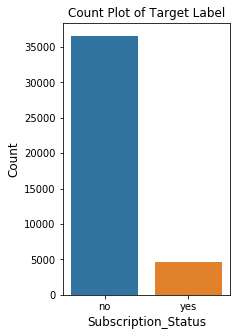

In [5]:
# Original Target Label Distribution: Table and Plot

df_targetLabel = df_raw['Subscription_Status'].value_counts().to_frame().reset_index()
df_targetLabel.rename(columns={'index':'Subscription_Status', 'Subscription_Status':'Count'}, inplace=True)
df_targetLabel['Percentage'] = ((df_targetLabel['Count']/df_targetLabel['Count'].sum())*100).map('{:.2f}%'.format)

fig = plt.figure(figsize=(3,5))
ax = sns.countplot(x='Subscription_Status', data=df_raw)
ax.set_title('Count Plot of Target Label')
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Subscription_Status', fontsize=12)
print(df_targetLabel)

In [5]:
# Drop irrelevent Features: Those that refer to the involvement of the client with the Marketing contact-centre

Init_length = len(df_raw.columns) # initial column composition of dataset 

To_drop = ['contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
           'previous', 'poutcome']

df_raw.drop(To_drop, axis=1, inplace=True)

print('The total number of columns in dataset is now %d' % (Init_length-len(To_drop)))
print('A total of %d columns have been dropped!' % len(To_drop))

The total number of columns in dataset is now 13
A total of 8 columns have been dropped!


In [7]:
# Check entire dataset for null values

for col in df_raw.columns:
    print(col, '\n', df_raw[col].isnull().value_counts(), '\n')

age 
 False    41188
Name: age, dtype: int64 

job 
 False    41188
Name: job, dtype: int64 

marital 
 False    41188
Name: marital, dtype: int64 

education 
 False    41188
Name: education, dtype: int64 

default 
 False    41188
Name: default, dtype: int64 

housing 
 False    41188
Name: housing, dtype: int64 

loan 
 False    41188
Name: loan, dtype: int64 

emp.var.rate 
 False    41188
Name: emp.var.rate, dtype: int64 

cons.price.idx 
 False    41188
Name: cons.price.idx, dtype: int64 

cons.conf.idx 
 False    41188
Name: cons.conf.idx, dtype: int64 

euribor3m 
 False    41188
Name: euribor3m, dtype: int64 

nr.employed 
 False    41188
Name: nr.employed, dtype: int64 

Subscription_Status 
 False    41188
Name: Subscription_Status, dtype: int64 



### Explore Categorical Features

In [6]:
# Explore 'unknown values': Display the number of 'unknown' values in each categorical features 

columns_categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan'] # Categorical Features

for col in columns_categorical:
    unknown_count = df_raw[df_raw[col]=='unknown'].shape[0]
    print(col + ':', unknown_count, '\n')

job: 330 

marital: 80 

education: 1731 

default: 8597 

housing: 990 

loan: 990 



In [7]:
df_raw[df_raw['default']=='unknown'].shape[0]
df_raw['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

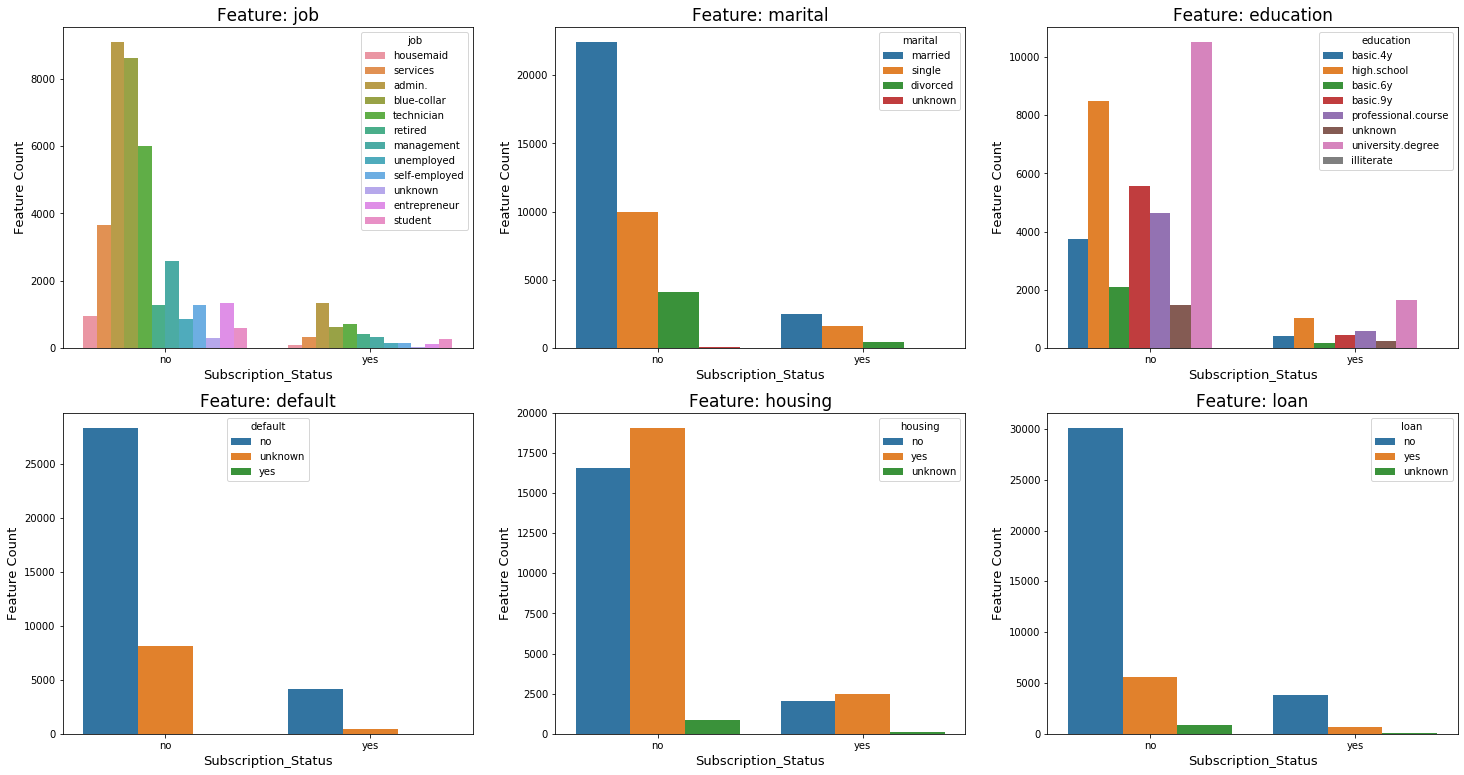

In [10]:
# Make subplots of Categorical Features against the target label('Subscription_Status') in order to assess information content

fig = plt.figure(figsize=(25,13))

for n, feature in zip(range(1,7), columns_categorical):
    axn = fig.add_subplot(2,3,n)
    sns.countplot(x='Subscription_Status', hue=feature, data=df_raw)
    axn.set_title('Feature: ' + feature, fontsize=17)
    axn.set_ylabel('Feature Count', fontsize=13)
    axn.set_xlabel('Subscription_Status', fontsize=13)
        

In [7]:
# Drop all rows having 'unknown' values 
for col in columns_categorical:
    df_raw.drop(df_raw[df_raw[col]=='unknown'].index, axis=0, inplace=True)
    
# The 'default' feature is subsequently dropped as the plot reveals low information content with more than 20% 'unknown'
df_raw.drop('default', axis=1, inplace=True)

dataset_shape(df_raw)

There are 30488 rows in the dataset
The total number of columns in dataset is 12; 11 features and 1 target label


### Explore Numeric Features

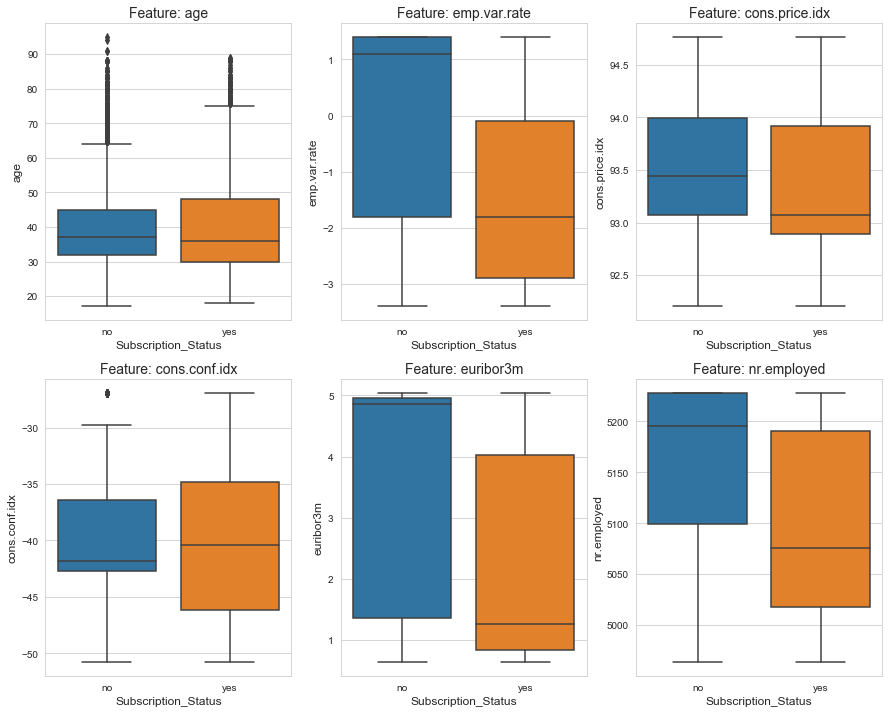

In [12]:
# Make boxplots of Numeric features against target label

columns_numerical = ['age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'] # Numerical Features
fig = plt.figure(figsize=(15,12))


for n, feature in zip(range(1,7), columns_numerical):
    sns.set_style("whitegrid")
    axn = fig.add_subplot(2,3,n)
    axn = sns.boxplot(x='Subscription_Status', y=feature, data=df_raw)
    axn.set_title('Feature: ' + feature, size=14)
    axn.set_ylabel(feature, size=12)
    axn.set_xlabel('Subscription_Status', size=12)
    #ax.set(ylabel = feature, xlabel = label)


In [8]:
# Dimensions of cleaned and feature-engineered dataset 

dataset_shape(df_raw)

There are 30488 rows in the dataset
The total number of columns in dataset is 12; 11 features and 1 target label


In [9]:
# Further explore numeric variables to assess the need for discretization

columns_numerical = ['age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for col in columns_numerical:
    df_Yes = df_raw[df_raw['Subscription_Status']=='yes'][col].reset_index(drop=True)
    df_No = df_raw[df_raw['Subscription_Status']=='no'][col].reset_index(drop=True)
    
    print(col)
    print('Yes_Count: %d' % len(df_Yes.unique()))
    print('No_Count: %d' % len(df_No.unique()), '\n')


age
Yes_Count: 72
No_Count: 74 

emp.var.rate
Yes_Count: 10
No_Count: 10 

cons.price.idx
Yes_Count: 26
No_Count: 26 

cons.conf.idx
Yes_Count: 26
No_Count: 26 

euribor3m
Yes_Count: 287
No_Count: 310 

nr.employed
Yes_Count: 11
No_Count: 11 



In [ ]:
count, bin_edges = np.histogram(df_raw['age'], 10)
df_raw['age'].plot(kind='hist', bins=10, xticks=bin_edges)
plt.title('Histogram Plot of \'age\'', fontsize=12)

# The 'age' feature has a positive skew

In [ ]:
# Discretize the 'age' feature into 13 bins. Create new feature 'age_binned'

cut_bins = [16, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 95]
label = ['class %d' % n for n in range(1,14)]

df_raw_binned = df_raw.copy()
    
df_raw_binned['age_binned'] = pd.cut(df_raw_binned['age'], bins=cut_bins, labels=label)

# Drop the redundant 'age' feature
df_raw_binned.drop('age', axis=1, inplace=True)

# Re=order the columns
columns_reorder = [df_raw_binned.columns[-1]] + list(df_raw_binned.columns[0:11])

df_raw_binned = df_raw_binned[columns_reorder]
df_raw_binned

In [ ]:
#cut_bins = [16, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 95]
cut_bins = [16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 95]
print(pd.cut(df_Age_Yes, bins=cut_bins).value_counts(), '\n')
print(pd.cut(df_Age_No, bins=cut_bins).value_counts())

### Load Pandas DataFrame 'df_raw' as spark DataFrame

In [10]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
        
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession.builder.getOrCreate()

In [11]:
# Load pandas DataFrame 'df_raw' as spark DataFrame object. Define explicit schema to facilitate

m = list(df_raw.columns) # list of pandas dataframe columns

from pyspark.sql.types import * 

schema = StructType([
    StructField(m[0],IntegerType(), True),
    StructField(m[1],StringType(), True),
    StructField(m[2],StringType(), True),
    StructField(m[3],StringType(), True),
    StructField(m[4],StringType(), True),
    StructField(m[5],StringType(), True),
    StructField(m[6],FloatType(), True),
    StructField(m[7],FloatType(), True),
    StructField(m[8],FloatType(), True),
    StructField(m[9],FloatType(), True),
    StructField(m[10],FloatType(), True),
    StructField(m[11],StringType(), True)])


Market_pred = spark.createDataFrame(df_raw, schema)
Market_pred.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- emp.var.rate: float (nullable = true)
 |-- cons.price.idx: float (nullable = true)
 |-- cons.conf.idx: float (nullable = true)
 |-- euribor3m: float (nullable = true)
 |-- nr.employed: float (nullable = true)
 |-- Subscription_Status: string (nullable = true)



In [13]:
# Rename columns

column_old = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
column_new = ['emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']

for col_old, col_new in zip(column_old, column_new):
    Market_pred = Market_pred.withColumnRenamed(col_old, col_new)
            
Market_pred.columns

['age',
 'job',
 'marital',
 'education',
 'housing',
 'loan',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'Subscription_Status']

In [14]:
# Confirm dimension of spark DataFrame (Market_pred)

print('Number of rows: %d' % Market_pred.count())
print('Number of columns: %d' % len(Market_pred.columns))


Number of rows: 30488
Number of columns: 12


## Model Development

In [15]:
# Create Indexed equivalent of categorical features and target label
from pyspark.ml.feature import StringIndexer

columns_categorical = ['job', 'marital', 'education', 'housing', 'loan', 'Subscription_Status']
columns_categorical_indexed = ['job_index', 'marital_index', 'education_index', 'housing_index', 'loan_index', 'label']

indexer = StringIndexer(inputCols= columns_categorical, outputCols=columns_categorical_indexed)
Market_indexed = indexer.fit(Market_pred).transform(Market_pred)
    
Market_indexed.columns

['age',
 'job',
 'marital',
 'education',
 'housing',
 'loan',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'Subscription_Status',
 'loan_index',
 'housing_index',
 'label',
 'marital_index',
 'education_index',
 'job_index']

In [16]:
# One-Hot encode categorical features and target label
from pyspark.ml.feature import OneHotEncoder

columns_categorical_indexed = ['job_index', 'marital_index', 'education_index', 'housing_index', 'loan_index']
columns_encoded = ['job_encode', 'marital_encode', 'education_encode', 'housing_encode', 'loan_encode']

encoder = OneHotEncoder(inputCols=columns_categorical_indexed, outputCols=columns_encoded)
Market_encoded = encoder.fit(Market_indexed).transform(Market_indexed)
    
Market_encoded.columns    

['age',
 'job',
 'marital',
 'education',
 'housing',
 'loan',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'Subscription_Status',
 'loan_index',
 'housing_index',
 'label',
 'marital_index',
 'education_index',
 'job_index',
 'housing_encode',
 'marital_encode',
 'education_encode',
 'loan_encode',
 'job_encode']

In [17]:
# Vector transformation of feature set
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

columns_vectors = ['age', 'job_encode', 'marital_encode', 'education_encode', 'housing_encode', 'loan_encode',
           'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']

assembler = VectorAssembler(inputCols=columns_vectors, outputCol='features')
Market_encoded_vector = assembler.transform(Market_encoded)

Market_encoded_vector.columns


['age',
 'job',
 'marital',
 'education',
 'housing',
 'loan',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'Subscription_Status',
 'loan_index',
 'housing_index',
 'label',
 'marital_index',
 'education_index',
 'job_index',
 'housing_encode',
 'marital_encode',
 'education_encode',
 'loan_encode',
 'job_encode',
 'features']

In [18]:
# Normalize feature set

#from pyspark.ml.feature import Normalizer
from pyspark.ml.feature import StandardScaler

Norm = StandardScaler(inputCol='features',outputCol='features_norm')

Market_encoded_normalized = Norm.fit(Market_encoded_vector).transform(Market_encoded_vector)
Market_encoded_normalized.columns

['age',
 'job',
 'marital',
 'education',
 'housing',
 'loan',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'Subscription_Status',
 'loan_index',
 'housing_index',
 'label',
 'marital_index',
 'education_index',
 'job_index',
 'housing_encode',
 'marital_encode',
 'education_encode',
 'loan_encode',
 'job_encode',
 'features',
 'features_norm']

In [ ]:
# Train-Test Split

split = Market_pred.randomSplit([0.8, 0.2])
Market_train = split[0]
Market_test = split[1]   

#### Logistic Regression

In [23]:
# Train Model
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

lr = LogisticRegression(maxIter = 10, regParam = 0.01, elasticNetParam = 0.8)
pipeline_lr = Pipeline(stages=[indexer, encoder, assembler, Norm, lr])

model_lr = pipeline_lr.fit(Market_train)
prediction_lr = model_lr.transform(Market_test)

#model = lr.fit(Market_encoded_normalized)
#prediction = model.transform(Market_encoded_normalized)

# Evaluate Model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator 

lr_evaluator = MulticlassClassificationEvaluator().setMetricName('accuracy').setPredictionCol("prediction")
lr_evaluator.evaluate(prediction_lr)

0.8740338760072357

#### Support Vector Machine

In [24]:
# Train Model
from pyspark.ml.classification import LinearSVC

svm = LinearSVC(maxIter = 10, regParam = 0.01)
pipeline_svm = Pipeline(stages=[indexer, encoder, assembler, Norm, svm])

model_svm = pipeline_svm.fit(Market_train)
prediction_svm = model_svm.transform(Market_test)

#model = lsvc.fit(Market_encoded_normalized)
#prediction = model.transform(Market_encoded_normalized)

# Evaluate Model
from pyspark.ml.evaluation import BinaryClassificationEvaluator 

svm_evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction')
svm_evaluator.evaluate(prediction_svm)

0.6713030759292509

#### Random Forest

In [25]:
# Train Model
from pyspark.ml.classification import RandomForestClassifier

rndf = RandomForestClassifier(numTrees = 5, maxDepth = 25, seed = 5)
pipeline_rndf = Pipeline(stages=[indexer, encoder, assembler, rndf])

model_rndf = pipeline_rndf.fit(Market_train)
prediction_rndf = model_rndf.transform(Market_test)

#model_rndf = rndf.fit(Market_encoded_vector)
#prediction = model_rndf.transform(Market_encoded_vector)

# Evaluator Model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator 

rndf_evaluator = MulticlassClassificationEvaluator().setMetricName('accuracy')
rndf_evaluator.evaluate(prediction_rndf)

0.8697582634435126

#### Gradient-Boosted Trees

In [26]:
# Train Model
from pyspark.ml.classification import GBTClassifier

GBT = GBTClassifier(maxIter = 10, maxDepth = 2, seed =2)
pipeline_GBT = Pipeline(stages=[indexer, encoder, assembler, GBT])

model_GBT = pipeline_GBT.fit(Market_train)
prediction_GBT = model_GBT.transform(Market_test)

#model_GBT = GBT.fit(Market_encoded_vector)
#prediction  = model_GBT.transform(Market_encoded_vector)

# Evaluate Model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator 

GBT_evaluator = MulticlassClassificationEvaluator().setMetricName('accuracy')
GBT_evaluator.evaluate(prediction_GBT)

0.8778161486597599

## Model Tuning

### Gradient-Boosted Trees

In [ ]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Set up the grid
Market_grid = ParamGridBuilder() \
                .addGrid(GBT.maxDepth, [15, 20, 25]) \
                .addGrid(GBT.maxBins, [8, 16, 32]) \
                .addGrid(GBT.seed, [2, 5, 10]) \
                .build()
            
# Create Crossvalidation object
Market_cross_val = CrossValidator(
                estimator = pipeline_GBT,
                estimatorParamMaps = Market_grid,
                evaluator = MulticlassClassificationEvaluator(),
                numFolds = 4)

# Train and Evaluate CrossValidator
Model_cross_val = Market_cross_val.fit(Market_train)
prediction_cross_val = Model_cross_val.transform(Market_test)

GBT_evaluator.evaluate(prediction_cross_val)

### Random Forest

In [27]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Set up the grid
Market_grid = ParamGridBuilder() \
                .addGrid(rndf.maxDepth, [10, 20, 25]) \
                .addGrid(rndf.numTrees, [8, 16, 32]) \
                .addGrid(GBT.seed, [2, 5, 10]) \
                .build()
            
# Create Crossvalidation object
Market_cross_val = CrossValidator(
                estimator = pipeline_rndf,
                estimatorParamMaps = Market_grid,
                evaluator = MulticlassClassificationEvaluator(),
                numFolds = 4)

# Train and Evaluate CrossValidator
Model_cross_val = Market_cross_val.fit(Market_train)
prediction_cross_val = Model_cross_val.transform(Market_test)

rndf_evaluator.evaluate(prediction_cross_val)

0.8801184015786877

In [12]:
# Train-Test Split
split = Market_pred.randomSplit([0.8, 0.2])
Market_train = split[0]
Market_test = split[1]   

In [ ]:
# Inspect class distribution between splits

Market_pred.createOrReplaceTempView('df')
Market_train.createOrReplaceTempView('df_train')
Market_test.createOrReplaceTempView('df_test')

dff = spark.sql('select Subscription_Status, count(Subscription_Status) as count from df group by Subscription_Status')

#spark.sql('select Distribution from df_Market').show()

### Deep Learning Implementation

In [ ]:
!pip uninstall tensorflow

In [28]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

### Test Code
df3 = Market_indexed.selectExpr("cast(age as string) age")
df3.printSchema()

In [ ]:
Market_indexed.columns[0:11]

In [ ]:
df1 = pd.DataFrame([[1,2,3], [4,5,6]], columns = ['First', 'Second', 'Third'])
df1.describe()

In [15]:
import pyspark

from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

df = spark.sql("select 'spark' as hello ")

df.show()

+-----+
|hello|
+-----+
|spark|
+-----+



In [152]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
        
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession.builder.getOrCreate()

In [ ]:
from pyspark import SparkConf, SparkContext

### Set up SparkContext
conf = SparkConf().setMaster('local').setAppName('Test')
sc = SparkContext(conf = conf)

In [ ]:
import wget
wget.download('https://github.com/IBM/coursera/raw/master/coursera_ml/a2.parquet')

In [ ]:
df=spark.read.load('a2.parquet')

df.createOrReplaceTempView("df")
spark.sql("SELECT * from df").show()

In [ ]:
# Naming convention

[project_name].data_exp.<technology>.<version>.<extension>
[project_name].etl.<technology>.<version>.<extension>
[project_name].feature_eng.<technology>.<version>.<extension>
[project_name].model_def.<technology>.<version>.<extension>
[project_name].model_train.<technology>.<version>.<extension>
[project_name].model_evaluate.<technology>.<version>.<extension>
[project_name].model_deployment.<technology>.<version>.<extension>

In [ ]:
Process Model Guidelines help to provide necessary annotation to the code upon which the model is built. A well-annotated model serves both the author and future users of the code.
Architectural Decision Guidelines ensure that data science projects are repeatable, reproducible. They also facilitate collaboration and the accommodation of Non-Functional-Requirements (NFR)

In [ ]:
from pyspark import SparkContext
sc = SparkContext("local", "First App")

In [24]:
# initialize pyspark
!pip install findspark
import findspark
findspark.init()

# perhaps not necessary. define sparkcontext separately
#import pyspark
#sc = pyspark.SparkContext(appName="myAppName")